### Question 1: Extract Tesla Stock Data Using yfinance

In [3]:
import yfinance as yf
import pandas as pd

# Create Ticker object for Tesla
tesla = yf.Ticker("TSLA")

# Extract historical market data
tesla_data = tesla.history(period="max")

# Reset index and display first 5 rows
tesla_data.reset_index(inplace=True)
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


### Question 2: Extract Tesla Revenue Data Using Web Scraping

import requests
from bs4 import BeautifulSoup

# URL for Tesla quarterly revenue
url_tesla = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Send request and parse HTML
html_tesla = requests.get(url_tesla).text
soup_tesla = BeautifulSoup(html_tesla, "html.parser")

# Extract revenue table
tables = soup_tesla.find_all("table")
tesla_revenue = pd.read_html(str(tables[0]))[0]

# Clean data
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].replace({'\$':'', ',':''}, regex=True)
tesla_revenue.dropna(inplace=True)
tesla_revenue.head()

### Question 3: Extract GameStop Stock Data Using yfinance

In [4]:
# Create Ticker object for GameStop
gme = yf.Ticker("GME")

# Extract historical market data
gme_data = gme.history(period="max")

# Reset index and display first 5 rows
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603295,1.662209,6892800,0.0,0.0


### Question 4: Extract GameStop Revenue Data Using Web Scraping

In [13]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html = requests.get(url).text
soup = BeautifulSoup(html, "html.parser")

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in soup.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

gme_revenue["Revenue"] = gme_revenue["Revenue"].replace({r'\$':'', ',':''}, regex=True)
gme_revenue.dropna(inplace=True)
gme_revenue.head()


,Date,Revenue


### Question 5: Tesla Stock and Revenue Dashboard

In [28]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://companiesmarketcap.com/tesla/revenue/"

html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

table = soup.find("table")
for row in table.find_all("tr")[1:]:
    cols = row.find_all("td")
    if len(cols) >= 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)


def convert_to_number(x):
    x = x.replace('$', '').replace(',', '').strip()
    if 'B' in x:
        return float(x.replace('B', '')) * 1e9
    elif 'M' in x:
        return float(x.replace('M', '')) * 1e6
    else:
        return pd.to_numeric(x, errors='coerce')

tesla_revenue["Revenue"] = tesla_revenue["Revenue"].apply(convert_to_number)
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"], errors='coerce')
tesla_revenue.dropna(inplace=True)

tesla_revenue.head()

C:\Users\RIJUL\AppData\Local\Temp\ipykernel_13368\3292080344.py:31: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"], errors='coerce')


,Date,Revenue
1,2024-01-01,9.769000e+10
2,2023-01-01,9.677000e+10
3,2022-01-01,8.146000e+10
4,2021-01-01,5.382000e+10
5,2020-01-01,3.153000e+10


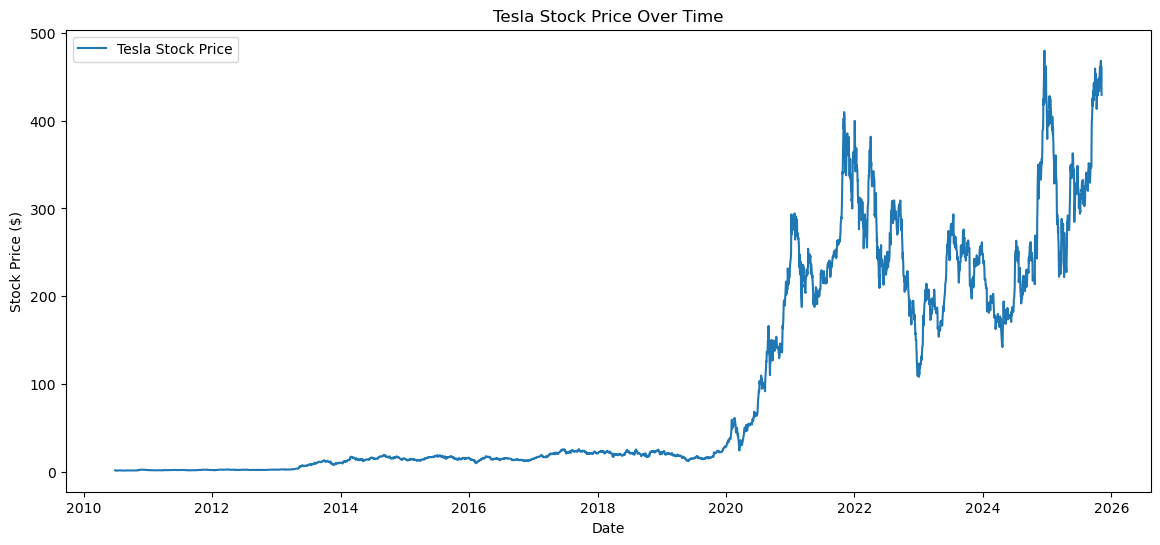

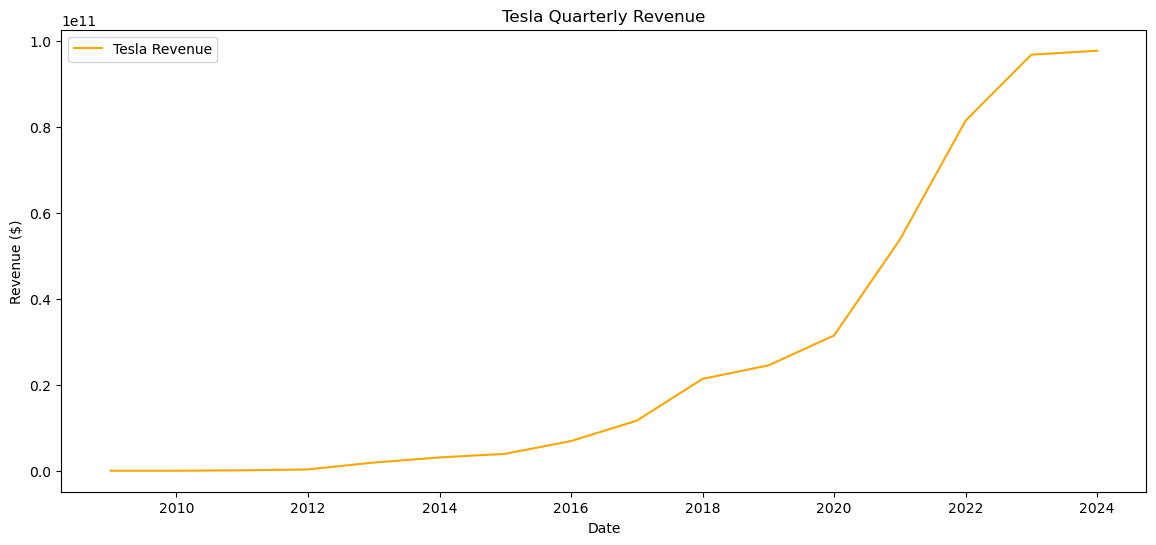

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(tesla_data["Date"], tesla_data["Close"], label="Tesla Stock Price")
plt.title("Tesla Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Stock Price ($)")
plt.legend()
plt.show()

plt.figure(figsize=(14,6))
plt.plot(tesla_revenue["Date"], tesla_revenue["Revenue"], label="Tesla Revenue", color='orange')
plt.title("Tesla Quarterly Revenue")
plt.xlabel("Date")
plt.ylabel("Revenue ($)")
plt.legend()
plt.show()

### Question 6: GameStop Stock and Revenue Dashboard

In [31]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Source: static page, no JS
url = "https://companiesmarketcap.com/gamestop/revenue/"

html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Extract table
table = soup.find("table")
for row in table.find_all("tr")[1:]:
    cols = row.find_all("td")
    if len(cols) >= 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)


def convert_to_number(x):
    x = x.replace('$', '').replace(',', '').strip()
    if 'B' in x:
        return float(x.replace('B', '')) * 1e9
    elif 'M' in x:
        return float(x.replace('M', '')) * 1e6
    else:
        return pd.to_numeric(x, errors='coerce')

gme_revenue["Revenue"] = gme_revenue["Revenue"].apply(convert_to_number)
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"], errors='coerce')
gme_revenue.dropna(inplace=True)

gme_revenue.head()


C:\Users\RIJUL\AppData\Local\Temp\ipykernel_13368\3546671776.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"], errors='coerce')


,Date,Revenue
1,2024-01-01,3.820000e+09
2,2023-01-01,5.270000e+09
3,2022-01-01,5.920000e+09
4,2021-01-01,6.010000e+09
5,2020-01-01,5.080000e+09


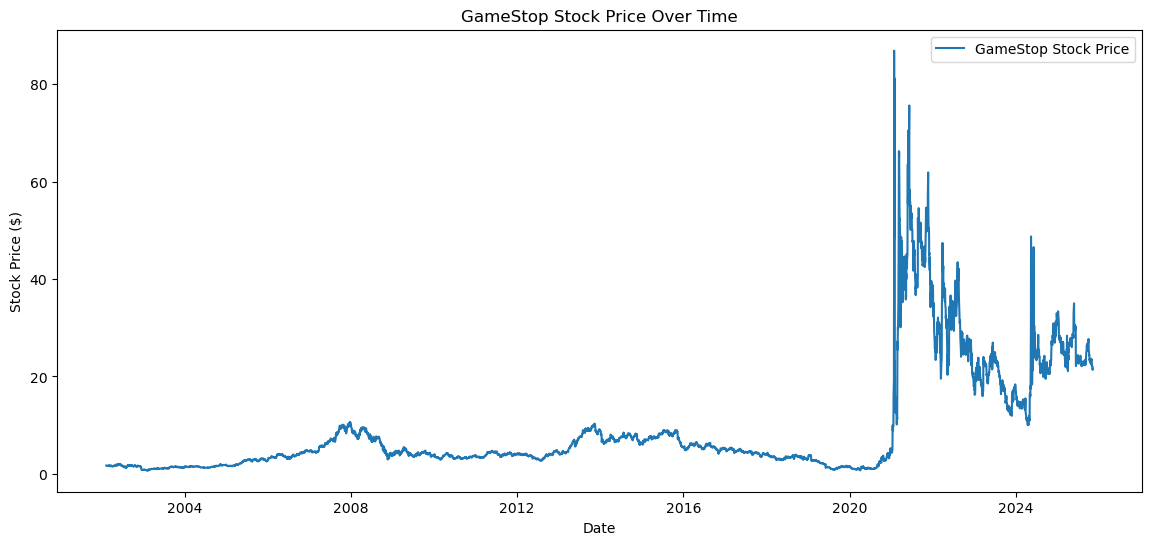

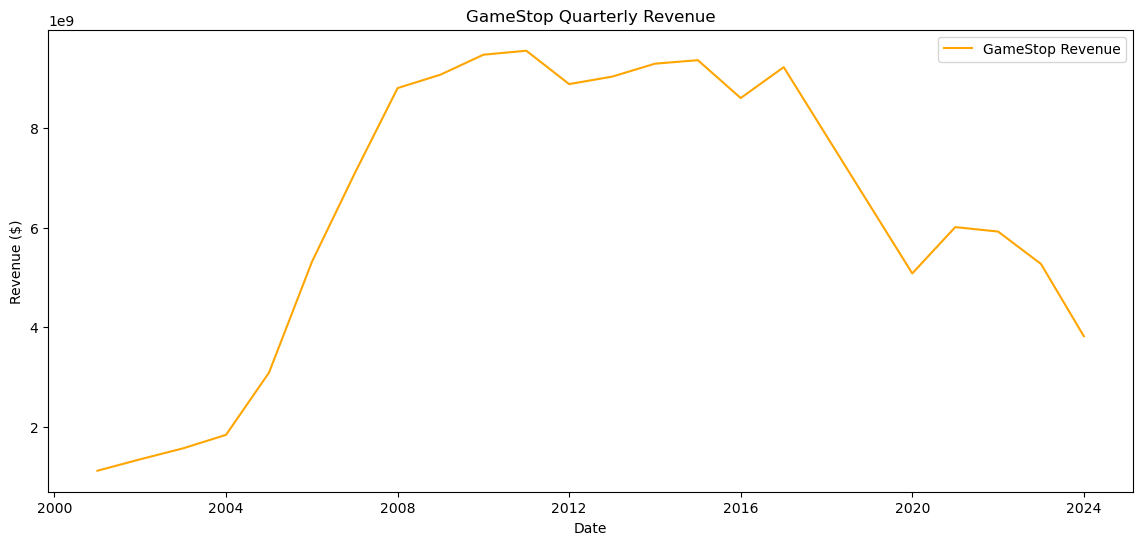

In [32]:
# Plot GameStop stock vs revenue
plt.figure(figsize=(14,6))
plt.plot(gme_data["Date"], gme_data["Close"], label="GameStop Stock Price")
plt.title("GameStop Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Stock Price ($)")
plt.legend()
plt.show()

plt.figure(figsize=(14,6))
plt.plot(gme_revenue["Date"], gme_revenue["Revenue"], label="GameStop Revenue", color='orange')
plt.title("GameStop Quarterly Revenue")
plt.xlabel("Date")
plt.ylabel("Revenue ($)")
plt.legend()
plt.show()